# Fracture and non fracture xray images  Binary classification using Convolutional neural network

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras import layers
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,Flatten

In [3]:
# getting the train data 

In [4]:
train_ds = keras.preprocessing.image_dataset_from_directory(directory='F:\\fracture detection CNN\\data\\train',seed=3,
                                                           validation_split=0.2,subset='training')

Found 8863 files belonging to 2 classes.
Using 7091 files for training.


In [5]:
test_ds = keras.preprocessing.image_dataset_from_directory(directory='F:\\fracture detection CNN\\data\\train',seed=3,
                                                          validation_split=0.2,subset='validation')

Found 8863 files belonging to 2 classes.
Using 1772 files for validation.


In [6]:
val_ds = keras.preprocessing.image_dataset_from_directory(directory='F:\\fracture detection CNN\\data\\val')

Found 600 files belonging to 2 classes.


In [30]:
class_names = train_ds.class_names
print(class_names)

['fractured 4480', 'not fractured 4383']


In [22]:
# lets plot some images from train,test and validation

In [29]:
for images,labels in train_ds.take(1):
    print('size of each batch is :', len(labels))
    print('Images in each batch is :',len(images))

size of each batch is : 32
Images in each batch is : 32


# checking for data imbalance in train dataset

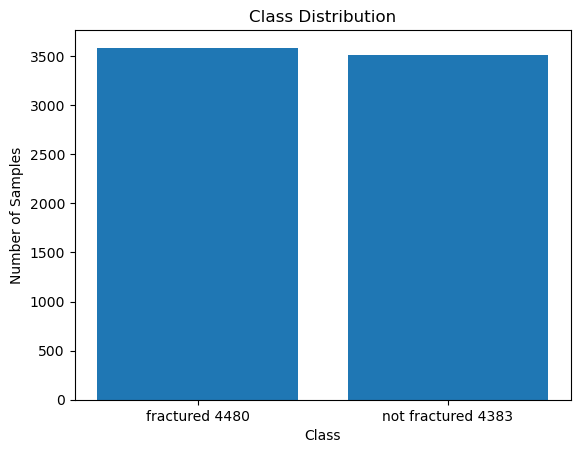

fractured 4480: 3585 samples (50.56% of total)
not fractured 4383: 3506 samples (49.44% of total)


In [31]:
# Count samples in each class
class_counts = {}
for images, labels in train_ds:
    for label in labels:
        class_name = class_names[label.numpy()]
        if class_name in class_counts:
            class_counts[class_name] += 1
        else:
            class_counts[class_name] = 1

# Visualize class distribution
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

# Check for imbalance
total_samples = sum(class_counts.values())
for class_name, count in class_counts.items():
    percentage = (count / total_samples) * 100
    print(f"{class_name}: {count} samples ({percentage:.2f}% of total)")



In [37]:
class_counts

{'fractured 4480': 3585, 'not fractured 4383': 3506}

In [33]:
#printing few labels

In [32]:
for _,labels in train_ds.take(1):
    print(labels)

tf.Tensor([0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1], shape=(32,), dtype=int32)


In [39]:
for images,labels in train_ds.take(1):
    print('shape of the images :',images.shape)
    print('shape of the labels :',labels.shape)

shape of the images : (32, 256, 256, 3)
shape of the labels : (32,)


# printing some images from train_ds

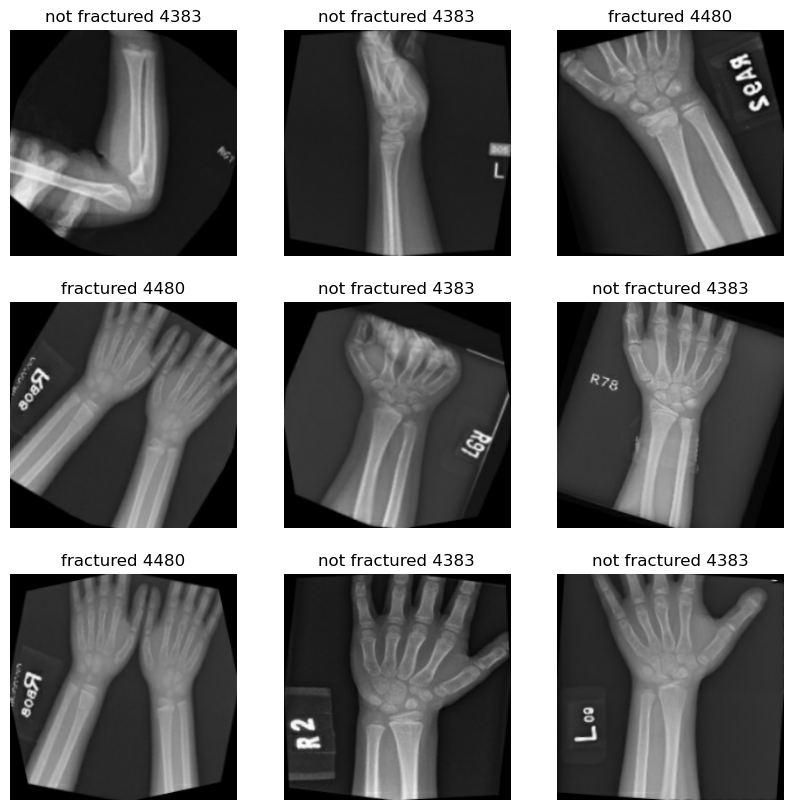

In [58]:
for images,labels in train_ds.take(1):
    plt.figure(figsize=(10,10))
    t=1
    for i in range(9):
        plt.subplot(3,3,t)
        plt.imshow(images[i].numpy().astype('uint8'))
        class_index = labels[i]
        plt.title(class_names[class_index])
        plt.axis('off')
        t+=1

# plotting Fractured  class images 

In [64]:
def filter_dataset_by_class(dataset, class_label):
    filtered_images = []
    filtered_labels = []
    for images, labels in dataset:
        for image, label in zip(images, labels):
            if label == class_label:
                filtered_images.append(image)
                filtered_labels.append(label)
    return tf.data.Dataset.from_tensor_slices((filtered_images, filtered_labels))

In [67]:
class_0 = filter_dataset_by_class(train_ds,0)

In [76]:
for imag,lab in class_0.take(3):
    print(imag.shape)
    print(lab.numpy())

(256, 256, 3)
0
(256, 256, 3)
0
(256, 256, 3)
0


In [77]:
# as this data is made by tensor_slicer so it does not have batches . Here if i use the .take function it takes that much of
# images 

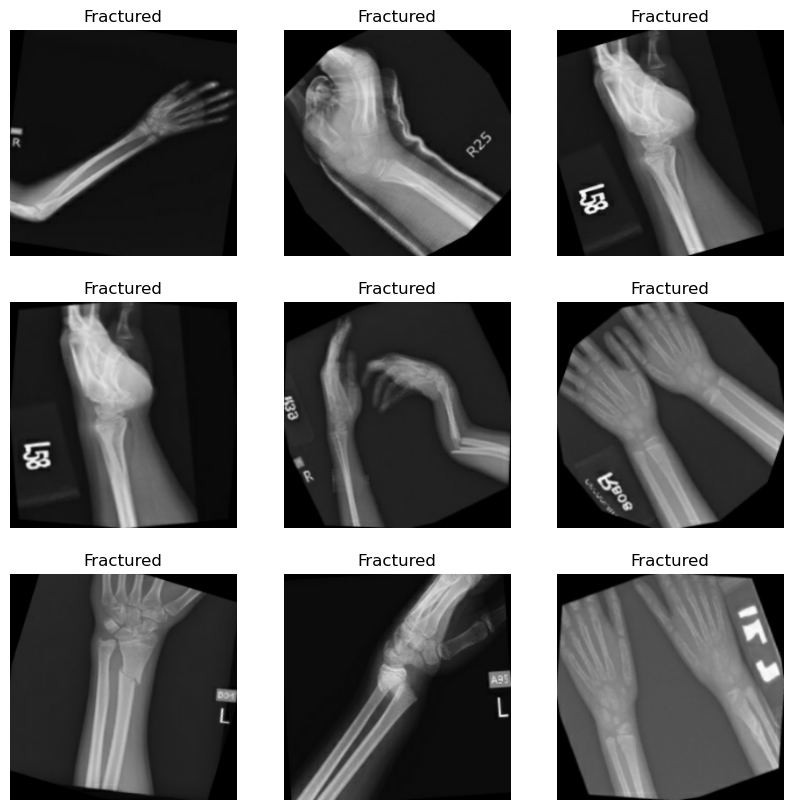

In [78]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(class_0.take(9)):  # Displaying first 9 images
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title('Fractured')
    plt.axis("off")
plt.show()


# plotting non_fractured  class images 

In [79]:
class_1 = filter_dataset_by_class(train_ds,1)

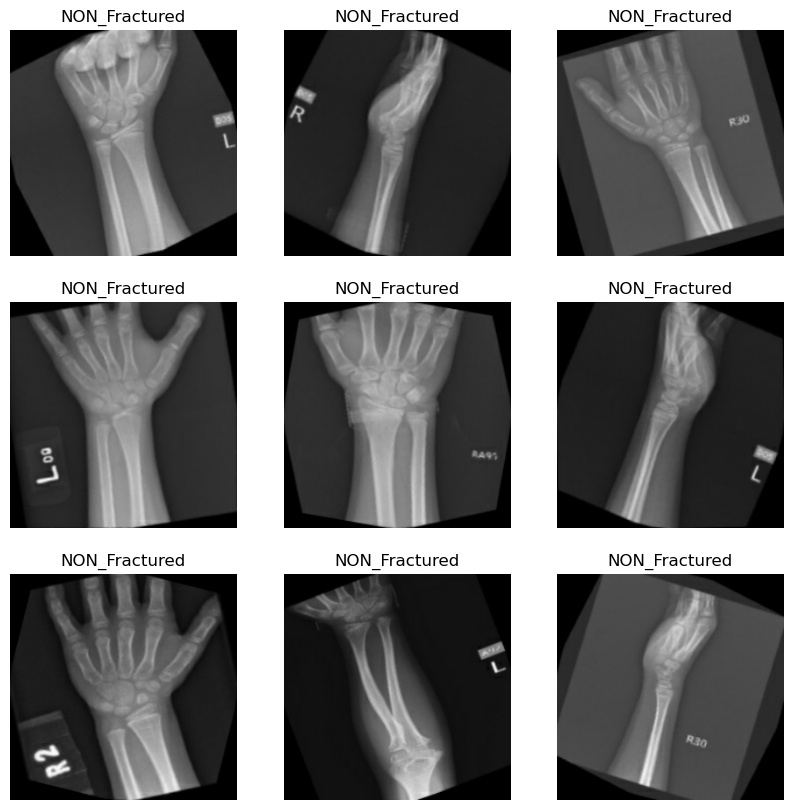

In [81]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(class_1.take(9)):  # Displaying first 9 images
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title('NON_Fractured')
    plt.axis("off")
plt.show()


In [84]:
# analysing the pictures through pixel intensity

In [93]:
def analyze_pixel_intensity(image):
    pixel_values = image.flatten()
    plt.hist(pixel_values, bins=256, range=(0, 255), color='gray', alpha=0.7)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Pixel Intensity Histogram for Class 0')
    plt.show()

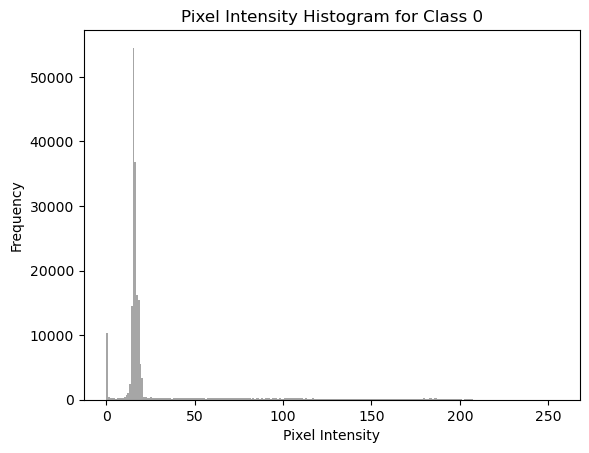

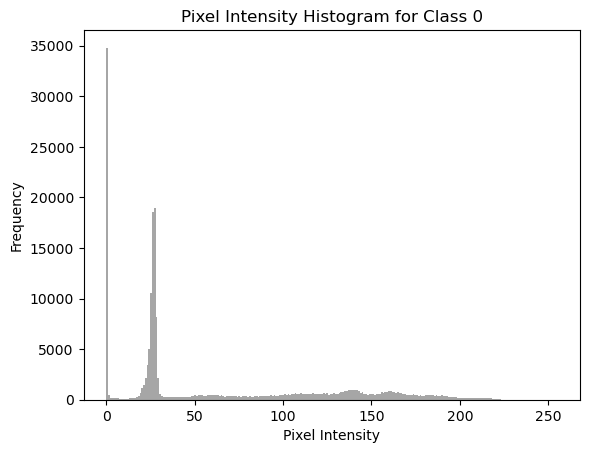

In [98]:
for image, label in class_0.take(2):
    image_array = image.numpy()  
    analyze_pixel_intensity(image_array)


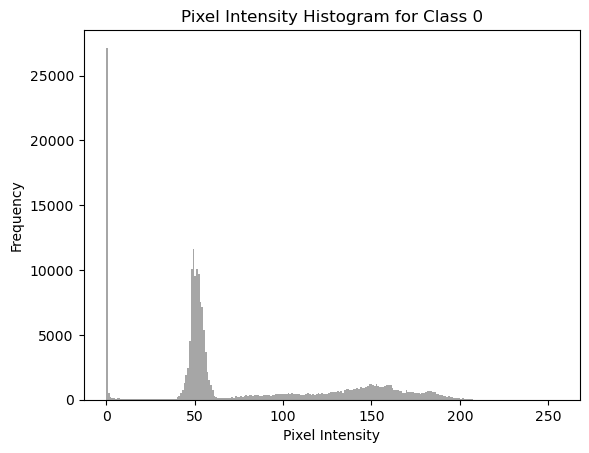

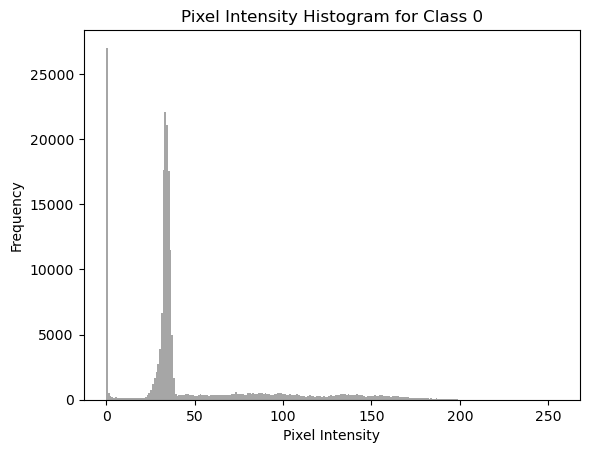

In [102]:
for image, label in class_1.take(2):
    image_array = image.numpy()  
    analyze_pixel_intensity(image_array)


In [83]:
#normalizing the images before training

In [7]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)
val_ds = val_ds.map(process)

# building a CNN Binary Classification Model

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
# only running for 3 epoch due to lack of system compatibility

In [13]:
result = model.fit(train_ds,epochs=3,validation_data=test_ds)

Epoch 1/3
222/222 [==============================] - 906s 4s/step - loss: 0.5562 - accuracy: 0.7007 - val_loss: 0.3940 - val_accuracy: 0.8115
Epoch 2/3
222/222 [==============================] - 871s 4s/step - loss: 0.2326 - accuracy: 0.9035 - val_loss: 0.1460 - val_accuracy: 0.9526
Epoch 3/3
222/222 [==============================] - 880s 4s/step - loss: 0.0783 - accuracy: 0.9719 - val_loss: 0.1277 - val_accuracy: 0.9684


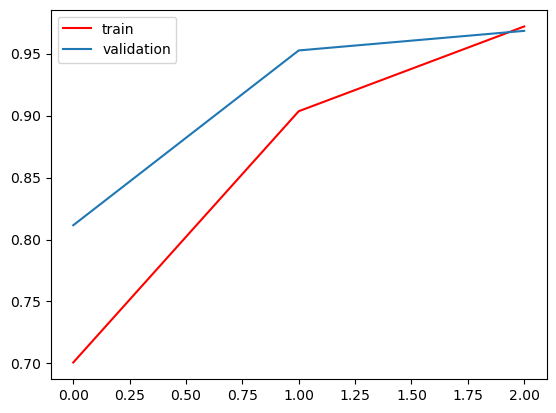

In [14]:
# checking the accuracy
plt.plot(result.history['accuracy'],color='red',label='train')
plt.plot(result.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

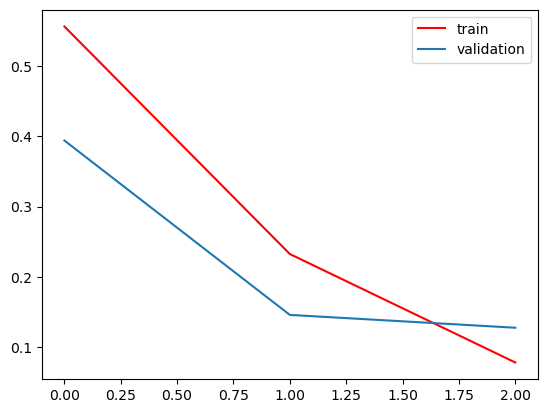

In [15]:
# checking the loss
plt.plot(result.history['loss'],color='red',label='train')
plt.plot(result.history['val_loss'],label='validation')
plt.legend()
plt.show()